<a href="https://colab.research.google.com/github/shyamjith94/Facebook-sProphetLibrary/blob/main/FaacebookProphet_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
!pip install pystan

In [3]:
%%capture
!pip install fbprophet

In [36]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse


In [5]:
data = pd.read_csv("/content/drive/MyDrive/Facebook-sProphetLibrary/Data/Miles_Traveled.csv")

In [6]:
data.columns

Index(['DATE', 'TRFVOLUSM227NFWA'], dtype='object')

In [10]:
data.columns = ['ds', 'y']
data['ds'] = pd.to_datetime(data['ds'])

In [11]:
data.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


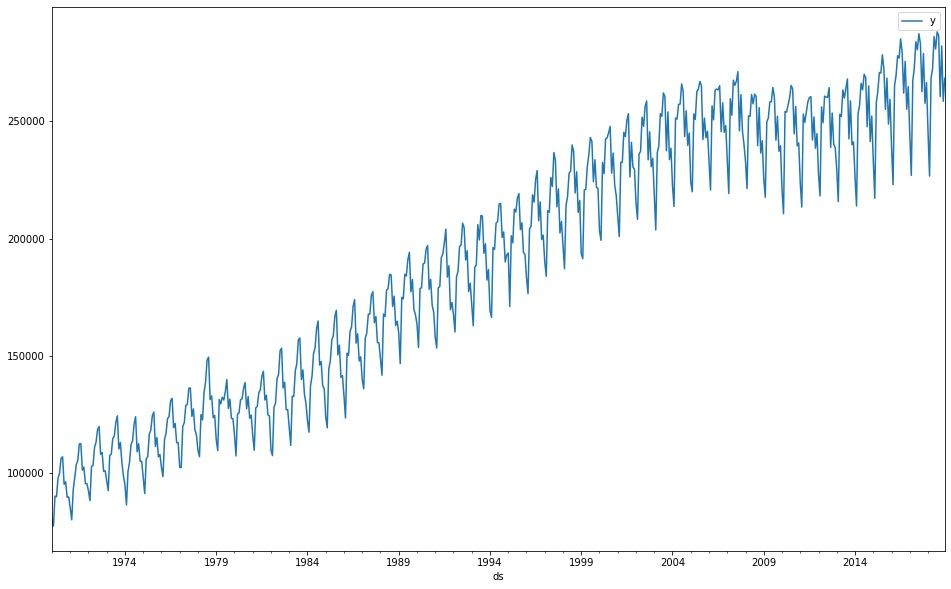

In [12]:
data.plot(x='ds', y='y', figsize=(16,10))

**Train Test Split**

In [13]:
len(data)

588

In [17]:
train_data = data.iloc[:576]
test_data = data.iloc[576:]

In [15]:
m = Prophet()
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

In [20]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
595,2019-08-01,268996.437177,280414.924416,290967.861707,268929.029336,269124.224338,16641.429175,16641.429175,16641.429175,16641.429175,16641.429175,16641.429175,0.0,0.0,0.0,285637.866352
596,2019-09-01,269193.993473,261766.531247,272935.257674,269088.195992,269372.862870,-1808.893440,-1808.893440,-1808.893440,-1808.893440,-1808.893440,-1808.893440,0.0,0.0,0.0,267385.100033
597,2019-10-01,269385.176985,268827.113107,280100.611328,269243.005965,269607.419477,5351.916397,5351.916397,5351.916397,5351.916397,5351.916397,5351.916397,0.0,0.0,0.0,274737.093382
598,2019-11-01,269582.733281,255565.316380,266236.886871,269386.461146,269849.056104,-8377.724468,-8377.724468,-8377.724468,-8377.724468,-8377.724468,-8377.724468,0.0,0.0,0.0,261205.008814
599,2019-12-01,269773.916793,257319.413363,268480.411283,269518.668773,270097.878724,-6901.750648,-6901.750648,-6901.750648,-6901.750648,-6901.750648,-6901.750648,0.0,0.0,0.0,262872.166145


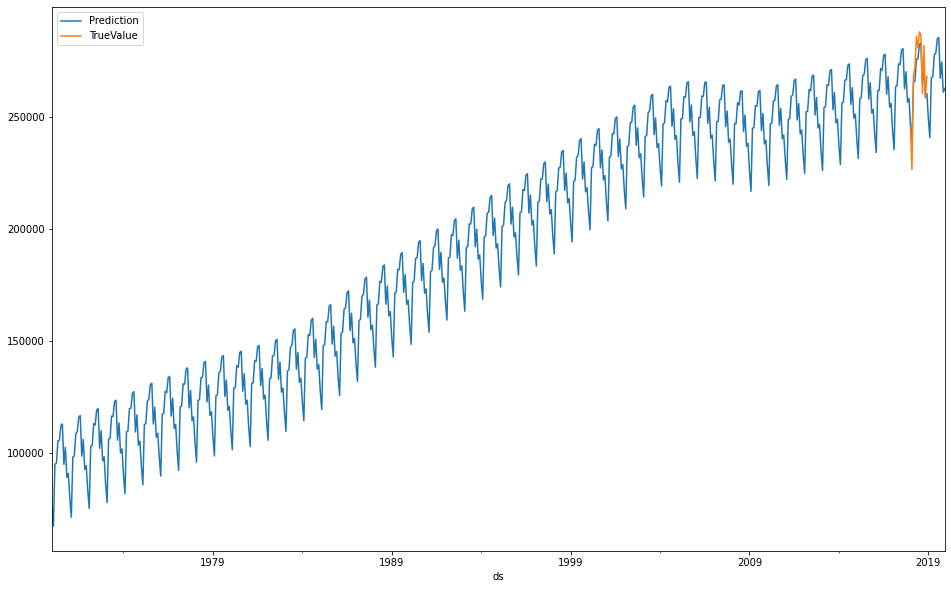

In [23]:
ax = forecast.plot(x='ds', y='yhat', label='Prediction', legend=True, figsize=(16,10))
test_data.plot(x='ds', y='y', label='TrueValue', legend=True, ax=ax)

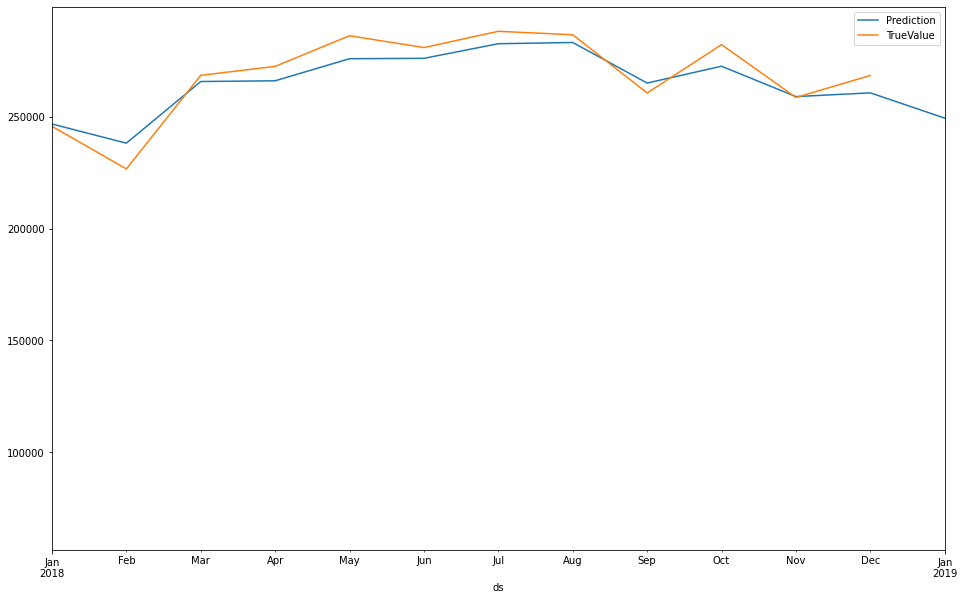

In [25]:
ax = forecast.plot(x='ds', y='yhat', label='Prediction', legend=True, figsize=(16,10))
test_data.plot(x='ds', y='y', label='TrueValue', legend=True, ax=ax, xlim=('2018-01-01', '2019-01-01'))

In [32]:
prediction = forecast.iloc[-12:]
prediction['yhat']

588    249343.681616
589    240858.561717
590    267654.330549
591    268071.626015
592    277975.410024
593    278604.642248
594    285079.648314
595    285637.866352
596    267385.100033
597    274737.093382
598    261205.008814
599    262872.166145
Name: yhat, dtype: float64

In [31]:
test_data['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [33]:
rmse(prediction['yhat'], test_data['y'])

6167.723581003236

In [34]:
test_data.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y    268739.666667
dtype: float64

**Cross validation prophet**

In [39]:
# initial 
# 5 - 5years
initial = 5*365
initial = str(initial) + ' days'
initial

'1825days'

In [40]:
# period 
# 5 - 5years
period = 5*365
period = str(period) + ' days'
period

'1825 days'

In [41]:
# horizon 
# 5 - 5years
horizon = 5*365
horizon = str(horizon) + ' days'
horizon

'1825 days'

In [42]:
data_cross_val = cross_validation(m, initial=initial, period=period, horizon=horizon)

INFO:fbprophet:Making 8 forecasts with cutoffs between 1978-12-11 00:00:00 and 2013-12-02 00:00:00


In [44]:
data_cross_val.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1979-01-01,120415.364046,118289.440140,122372.535247,114354.0,1978-12-11
1,1979-02-01,115990.602406,113926.049009,118088.329171,109650.0,1978-12-11
2,1979-03-01,129277.480722,127367.623232,131359.801661,131406.0,1978-12-11
3,1979-04-01,131743.155856,129661.375982,133851.034984,129539.0,1978-12-11
4,1979-05-01,140552.427095,138388.321121,142611.944560,132394.0,1978-12-11


In [46]:
performance_metrics(data_cross_val)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,181 days,4.076288e+07,6384.581728,5375.309260,0.028896,0.026148,0.333333
1,202 days,4.486215e+07,6697.921362,5567.382266,0.030152,0.026148,0.333333
2,204 days,4.548269e+07,6744.085315,5616.784037,0.030248,0.026148,0.333333
3,205 days,4.519360e+07,6722.618209,5572.636165,0.029924,0.025687,0.354167
4,206 days,4.370781e+07,6611.188184,5457.495763,0.029148,0.025174,0.354167
...,...,...,...,...,...,...,...
428,1820 days,2.994258e+08,17303.925555,15234.189072,0.072269,0.070114,0.270833
429,1821 days,2.994057e+08,17303.342786,15223.931734,0.072232,0.070114,0.270833
430,1823 days,3.013421e+08,17359.209084,15270.787710,0.072529,0.070114,0.270833
431,1824 days,3.043856e+08,17446.648676,15347.599939,0.072959,0.072627,0.270833


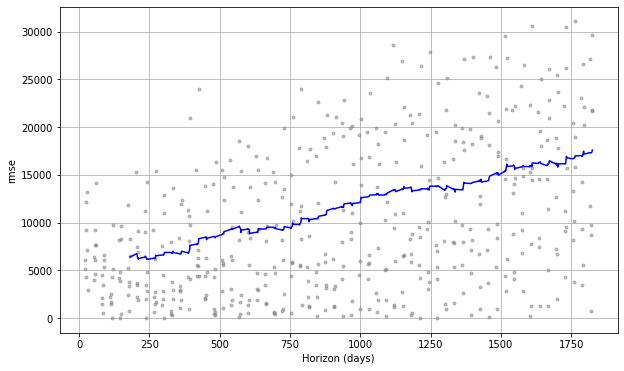

In [48]:
plot_cross_validation_metric(data_cross_val, metric='rmse');

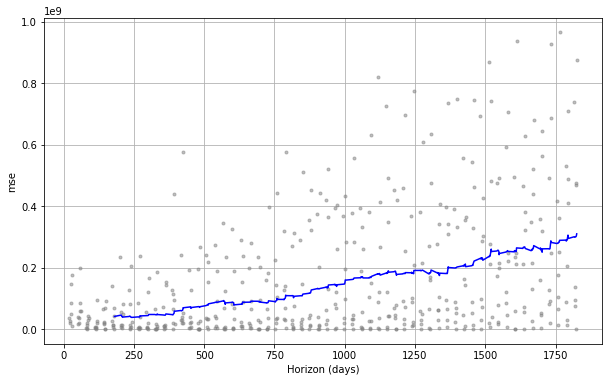

In [49]:
plot_cross_validation_metric(data_cross_val, metric='mse');